<a href="https://colab.research.google.com/github/nirvanK11/The-Fashion-MNIST-dataset/blob/main/Copy_of_DLPC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install the Keras-tuner library
!pip install keras-tuner

     |████████████████████████████████| 98 kB 2.7 MB/s 


In [ ]:
# import the library and refer to it as kt
import kerastuner as kt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout, Flatten
from keras.utils import np_utils


In [ ]:
# import fashion mnist module
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# download fashion mnist data and split into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


def load_data()
Loads the Fashion-MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
along with a test set of 10,000 images. This dataset can be used as
a drop-in replacement for MNIST.

The classes are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


In [ ]:
# data pre-processing - we need to reshape to specify a channel of 1 on the end of the
# data to signify that there is one channel as it is a grayscale image
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# resize and normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one-hot encode the train and test target columns
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# create the model
from keras.models import Sequential
from keras.layers import Dense
# create a regularizer object
from tensorflow.keras import regularizers # import the regularizers module
reg = regularizers.l2(l2=0.01)
def model_builder(hp):
  model = Sequential() 
  model.add(Flatten(input_shape=(28,28)))
  hp_units = hp.Int('hidden_layer_1_units', min_value = 32, max_value = 512, step = 32)
  model.add(Dense(hp_units, activation ='relu',kernel_regularizer=reg))
  model.add(Dropout(0.2))
  hp_units = hp.Int('hidden_layer_2_units', min_value = 64, max_value = 128, step = 32)
  model.add(Dense(hp_units, activation ='relu',kernel_regularizer=reg))
  model.add(Dropout(0.2))
  model.add(Dense(units=30,activation ='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  model.summary()
  # compiling the model
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1,1e-2, 1e-3, 1e-4]) 
  # create the Adam optimiser, specifying the variable learning rate
  opt = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate)
  model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,        # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir',  # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro_to_kt') 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                1950      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0

Call back

In [ ]:
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

Hyperparameter tunning

In [ ]:
import IPython
# run the hyperparameter search
tuner.search(x_train, y_train, epochs = 15, validation_data = (x_test, y_test), callbacks = [ClearTrainingOutput()])

Trial 30 Complete [00h 01m 59s]
val_accuracy: 0.8489000201225281

Best val_accuracy So Far: 0.8489000201225281
Total elapsed time: 00h 31m 29s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'hidden_layer_1_units': 256, 'hidden_layer_2_units': 96, 'learning_rate': 0.0001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [ ]:
# apply the optimal hyperparameters to the model and print the summary
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 96)                24672     
                                                                 
 dropout_4 (Dropout)         (None, 96)                0         
                                                                 
 dense_6 (Dense)             (None, 30)                2910      
                                                                 
 dropout_5 (Dropout)         (None, 30)               

In [ ]:
# retrain the model with the optimum hyperparameters and train it on the data
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
1875/1875 [==============================] - 12s 6ms/step - loss: 3.3281 - accuracy: 0.6491 - val_loss: 1.6691 - val_accuracy: 0.7938
Epoch 2/120
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3756 - accuracy: 0.7698 - val_loss: 0.9932 - val_accuracy: 0.8127
Epoch 3/120
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9566 - accuracy: 0.7893 - val_loss: 0.7685 - val_accuracy: 0.8265
Epoch 4/120
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8012 - accuracy: 0.8043 - val_loss: 0.6900 - val_accuracy: 0.8271
Epoch 5/120
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7272 - accuracy: 0.8134 - val_loss: 0.6356 - val_accuracy: 0.8333
Epoch 6/120
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6806 - accuracy: 0.8199 - val_loss: 0.6082 - val_accuracy: 0.8369
Epoch 7/120
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6514 - accuracy: 0.8258 - val_loss: 0.5861 -

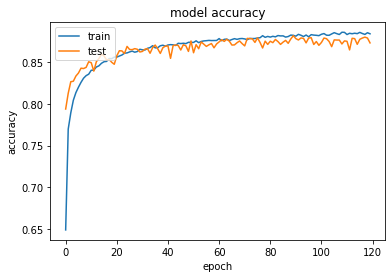

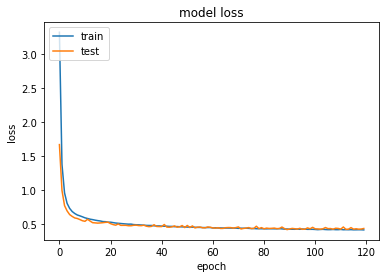

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()